In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
X = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\new\\2_combine_address_drop_parking_area\\ready_train_2.csv')
y = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\new\\ready_y.csv')

# Clustering

In [3]:
#因為做了one hot encoding維度太高,所以用原始資料分群。
train = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\new\\0.unchange data\\ktrain.csv')

In [4]:
#合併地址drop parking_area,已經drop pk_area了
data = train.drop(['city', 'town', 'village'], axis = 1)

In [5]:
#選分類特徵(根據權重)
choose = [ 'address', 'building_area', 'total_price'] 

In [6]:
ks = KMeans(n_clusters=10).fit(train[choose])

In [7]:
labels = pd.DataFrame((ks.labels_).tolist())

In [8]:
labels.describe()

,0
count,60000.000000
mean,5.751950
std,3.634663
min,0.000000
25%,3.000000
50%,9.000000
75%,9.000000
max,9.000000


In [9]:
train_addlabels = pd.concat([X, labels, y],axis=1)
train_addlabels.head(3)

,Unnamed: 0,III_10,III_100,III_1000,III_10000,III_250,III_50,III_500,III_5000,III_MIN,...,parking_way_2,total_floor,town_area,town_population,town_population_density,txn_dt,txn_floor,village_income_median,0,total_price
0,0,0,3,91,3728,17,1,37,1861,42.635964,...,1,4,1.4161,24219,17103,18674,3.0,572,3,6.476038e+05
1,1,1,1,29,7380,4,1,11,2512,7.157464,...,1,5,23.1373,551480,23835,18800,5.0,550,9,3.321452e+06
2,2,0,1,235,7971,17,0,73,2695,86.589412,...,1,4,23.1373,551480,23835,19289,1.0,625,0,9.570885e+06


# group split

In [10]:
group0 = train_addlabels[0]==0
group1 = train_addlabels[0]==1
group2 = train_addlabels[0]==2
group3 = train_addlabels[0]==3
group4 = train_addlabels[0]==4
group5 = train_addlabels[0]==5
group6 = train_addlabels[0]==6
group7 = train_addlabels[0]==7
group8 = train_addlabels[0]==8
group9 = train_addlabels[0]==9

In [11]:
group_0 = train_addlabels[group0]
group_1 = train_addlabels[group1]
group_2 = train_addlabels[group2]
group_3 = train_addlabels[group3]
group_4 = train_addlabels[group4]
group_5 = train_addlabels[group5]
group_6 = train_addlabels[group6]
group_7 = train_addlabels[group7]
group_8 = train_addlabels[group8]
group_9 = train_addlabels[group9]

print('group_0',group_0.shape)
print('group_1',group_1.shape)
print('group_2',group_2.shape)
print('group_3',group_3.shape)
print('group_4',group_4.shape)
print('group_5',group_5.shape)
print('group_6',group_6.shape)
print('group_7',group_7.shape)
print('group_8',group_8.shape)
print('group_9',group_9.shape)

group_0 (10825, 4500)
group_1 (9, 4500)
group_2 (2402, 4500)
group_3 (4958, 4500)
group_4 (10008, 4500)
group_5 (81, 4500)
group_6 (4, 4500)
group_7 (28, 4500)
group_8 (392, 4500)
group_9 (31293, 4500)


In [26]:
group_0

,Unnamed: 0,III_10,III_100,III_1000,III_10000,III_250,III_50,III_500,III_5000,III_MIN,...,parking_way_2,total_floor,town_area,town_population,town_population_density,txn_dt,txn_floor,village_income_median,0,total_price
2,2,0,1,235,7971,17,0,73,2695,86.589412,...,1,4,23.1373,551480,23835,19289,1.0,625,0,9.570885e+06
9,9,0,2,201,10173,9,1,31,3849,36.215680,...,0,10,23.1373,551480,23835,19927,2.0,604,0,1.181540e+07
13,13,0,1,280,8923,8,0,66,2979,99.084882,...,1,3,23.1373,551480,23835,19674,3.0,665,0,4.807053e+06
14,14,0,0,77,8968,1,0,5,2665,246.256698,...,1,13,120.2255,302089,2513,19824,9.0,612,0,7.493027e+06
16,16,0,0,51,4030,1,0,23,968,216.211304,...,1,5,33.1288,184149,5559,19545,1.0,515,0,2.846856e+06
17,17,0,1,54,2258,3,0,6,722,93.635246,...,1,7,21.1248,86593,4099,19765,5.0,567,0,4.141155e+06
18,18,0,2,287,8190,8,1,64,2266,36.901377,...,1,17,19.7383,416524,21102,18792,7.0,573,0,6.521007e+06
19,19,0,0,56,5925,5,0,14,1290,129.207819,...,1,5,19.1603,78911,4118,19528,1.0,583,0,6.052645e+06
29,29,0,1,166,7682,14,0,50,2042,63.420685,...,0,10,19.7383,416524,21102,19809,4.0,649,0,6.052645e+06
32,32,0,1,214,9602,14,0,45,3377,75.193694,...,1,4,23.1373,551480,23835,18690,1.0,684,0,9.035287e+06


# 各組刪離群值

In [12]:
a = np.percentile(group_0['land_area'], 75)
b = np.percentile(group_1['land_area'], 75)
c = np.percentile(group_2['land_area'], 75)
d = np.percentile(group_3['land_area'], 75)
e = np.percentile(group_4['land_area'], 75)
f = np.percentile(group_5['land_area'], 75)
g = np.percentile(group_6['land_area'], 75)
h = np.percentile(group_7['land_area'], 75)
i = np.percentile(group_8['land_area'], 75)
j = np.percentile(group_9['land_area'], 75)

In [13]:
mask_0 = group_0['land_area'] < a*1.5*2
Group0 = group_0[mask_0]
mask_1 = group_1['land_area'] < b*1.5*2
Group1 = group_1[mask_1]
mask_2 = group_2['land_area'] < c*1.5*2
Group2 = group_2[mask_2]
mask_3 = group_3['land_area'] < d*1.5*2
Group3 = group_3[mask_3]
mask_4 = group_4['land_area'] < e*1.5*2
Group4 = group_4[mask_4]
mask_5 = group_5['land_area'] < f*1.5*2
Group5 = group_5[mask_5]
mask_6 = group_6['land_area'] < g*1.5*2
Group6 = group_6[mask_6]
mask_7 = group_7['land_area'] < h*1.5*2
Group7 = group_7[mask_7]
mask_8 = group_8['land_area'] < i*1.5*2
Group8 = group_8[mask_8]
mask_9 = group_9['land_area'] < j*1.5*2
Group9 = group_9[mask_9]

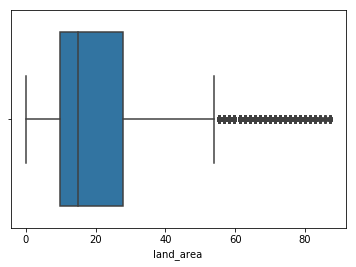

In [14]:
sns.boxplot(Group9['land_area'])

In [15]:
group_1.shape

(4959, 4500)

In [16]:
Group1.shape

(4868, 4500)

# select from model

In [14]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split
from sklearn import  preprocessing , metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor
from xgboost import XGBRFRegressor 
import xgboost as xgb
from sklearn import svm
from sklearn.feature_selection import SelectFromModel

group0

In [23]:
XGroup0 = Group0.iloc[:, :-2]
yGroup0 = Group0['total_price']

In [27]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup0, yGroup0)
model_ex = SelectFromModel(extree_reg,prefit=True)
X0_ex = model_ex.transform(XGroup0)
X0_ex.shape

(3025, 291)

In [31]:
X0_ex = XGroup0[XGroup0.columns[model_ex.get_support()]]

In [19]:
kf = KFold(n_splits=5)

In [20]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
xgbreg = xgb.XGBRegressor(n_estimators=400,subsample=0.88,max_depth=3,colsample_bytree=0.88,
                             min_child_weight=2,reg_alpha=0.01,objective='reg:squarederror')

In [37]:
# extree baise
print(X0_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X0_ex, yGroup0, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X0_ex, yGroup0, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X0_ex, yGroup0, cv=kf, n_jobs = -1))

(3025, 291)
forest_with_treemodel [0.64910697 0.59831511 0.68200932 0.71969548 0.72528679]
extree_with_treemodel [0.65877999 0.62724817 0.6934169  0.71271482 0.70231248]
xgb_with_treemodel [0.70552123 0.66968556 0.73771039 0.76883033 0.74231247]


group1

In [38]:
XGroup1 = Group1.iloc[:, :-2]
yGroup1 = Group1['total_price']

In [47]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup1, yGroup1)
model_ex = SelectFromModel(extree_reg,prefit=True)
X1_ex = model_ex.transform(XGroup1)
X1_ex.shape

(4868, 178)

In [48]:
X1_ex = XGroup1[XGroup1.columns[model_ex.get_support()]]

In [49]:
print(X1_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X1_ex, yGroup1, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X1_ex, yGroup1, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X1_ex, yGroup1, cv=kf, n_jobs = -1))

(4868, 178)
forest_with_treemodel [0.84293182 0.87630798 0.8872198  0.90241849 0.6880913 ]
extree_with_treemodel [0.87484521 0.91360595 0.92952882 0.91513124 0.78999412]
xgb_with_treemodel [0.86832701 0.9206184  0.91858626 0.9299443  0.80888971]


goup2

In [50]:
XGroup2 = Group2.iloc[:, :-2]
yGroup2 = Group2['total_price']

In [51]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup2, yGroup2)
model_ex = SelectFromModel(extree_reg,prefit=True)
X2_ex = model_ex.transform(XGroup2)
X2_ex.shape
X2_ex = XGroup2[XGroup2.columns[model_ex.get_support()]]

In [52]:
print(X2_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X2_ex, yGroup2, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X2_ex, yGroup2, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X2_ex, yGroup2, cv=kf, n_jobs = -1))

(4, 119)


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

group3

In [53]:
XGroup3 = Group3.iloc[:, :-2]
yGroup3 = Group3['total_price']

In [54]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup3, yGroup3)
model_ex = SelectFromModel(extree_reg,prefit=True)
X3_ex = model_ex.transform(XGroup3)
X3_ex = XGroup3[XGroup3.columns[model_ex.get_support()]]

In [55]:
print(X3_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X3_ex, yGroup3, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X3_ex, yGroup3, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X3_ex, yGroup3, cv=kf, n_jobs = -1))

(10409, 186)
forest_with_treemodel [0.92469002 0.90477504 0.91055435 0.91946399 0.93112911]
extree_with_treemodel [0.92407665 0.91160113 0.9288471  0.9260249  0.93722758]
xgb_with_treemodel [0.92415612 0.91952815 0.92892446 0.93172928 0.94250926]


group4

In [56]:
XGroup4 = Group4.iloc[:, :-2]
yGroup4 = Group4['total_price']

In [57]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup4, yGroup4)
model_ex = SelectFromModel(extree_reg,prefit=True)
X4_ex = model_ex.transform(XGroup4)
X4_ex = XGroup4[XGroup4.columns[model_ex.get_support()]]

In [58]:
print(X4_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X4_ex, yGroup4, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X4_ex, yGroup4, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X4_ex, yGroup4, cv=kf, n_jobs = -1))

(149, 205)
forest_with_treemodel [ 0.08516079  0.12459718  0.28753869 -0.47071412  0.01008075]
extree_with_treemodel [-0.00519672  0.10043125  0.26393415 -0.40864231 -0.02863979]
xgb_with_treemodel [ 0.28996903  0.16937061  0.36474039 -0.80943862  0.15609397]


group5

In [22]:
XGroup5 = Group5.iloc[:, :-2]
yGroup5 = Group5['total_price']

In [23]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup5, yGroup5)
model_ex = SelectFromModel(extree_reg,prefit=True)
X5_ex = model_ex.transform(XGroup5)
X5_ex = XGroup5[XGroup5.columns[model_ex.get_support()]]

In [24]:
print(X5_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X5_ex, yGroup5, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X5_ex, yGroup5, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X5_ex, yGroup5, cv=kf, n_jobs = -1))

(74, 183)
forest_with_treemodel [-0.091958    0.20766994  0.40368894  0.17402379 -0.23856129]
extree_with_treemodel [ 0.13507887 -0.14537243  0.23772127 -0.07976826 -0.75152714]
xgb_with_treemodel [ 0.37489429  0.16852236  0.15724619 -0.02294525 -0.92706526]


group6

In [59]:
XGroup6 = Group6.iloc[:, :-2]
yGroup6 = Group6['total_price']

In [18]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup6, yGroup6)
model_ex = SelectFromModel(extree_reg,prefit=True)
X6_ex = model_ex.transform(XGroup6)
X6_ex = XGroup6[XGroup6.columns[model_ex.get_support()]]

NameError: name 'XGroup6' is not defined

In [61]:
print(X6_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X6_ex, yGroup6, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X6_ex, yGroup6, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X6_ex, yGroup6, cv=kf, n_jobs = -1))

(40, 144)
forest_with_treemodel [ 0.38547987  0.72197475  0.75364875 -0.17225442  0.31855406]
extree_with_treemodel [ 0.35527501  0.82757889  0.70426237 -0.4484237   0.35185952]
xgb_with_treemodel [0.37430397 0.72616291 0.68636806 0.10627047 0.56113279]


group7

In [62]:
XGroup7 = Group7.iloc[:, :-2]
yGroup7 = Group7['total_price']

In [63]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup7, yGroup7)
model_ex = SelectFromModel(extree_reg,prefit=True)
X7_ex = model_ex.transform(XGroup7)
X7_ex = XGroup7[XGroup7.columns[model_ex.get_support()]]

In [64]:
print(X7_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X7_ex, yGroup7, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X7_ex, yGroup7, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X7_ex, yGroup7, cv=kf, n_jobs = -1))

(9802, 190)
forest_with_treemodel [0.93297166 0.92220751 0.915495   0.89088626 0.90911371]
extree_with_treemodel [0.93503743 0.93050088 0.92288985 0.90005706 0.91304832]
xgb_with_treemodel [0.93050847 0.93269862 0.9241414  0.90512146 0.91762898]


group8

In [65]:
XGroup8 = Group8.iloc[:, :-2]
yGroup8 = Group8['total_price']

In [66]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup8, yGroup8)
model_ex = SelectFromModel(extree_reg,prefit=True)
X8_ex = model_ex.transform(XGroup8)
X8_ex = XGroup8[XGroup8.columns[model_ex.get_support()]]

In [67]:
print(X8_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X8_ex, yGroup8, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X8_ex, yGroup8, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X8_ex, yGroup8, cv=kf, n_jobs = -1))

(537, 245)
forest_with_treemodel [0.54001725 0.50267283 0.56637641 0.24664281 0.53250445]
extree_with_treemodel [0.57902076 0.46303789 0.57660391 0.25302032 0.57864544]
xgb_with_treemodel [0.63048125 0.5538734  0.6127191  0.45545565 0.50989459]


group9

In [15]:
XGroup9 = Group9.iloc[:, :-2]
yGroup9 = Group9['total_price']

In [16]:
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
extree_reg = extree.fit(XGroup9, yGroup9)
model_ex = SelectFromModel(extree_reg,prefit=True)
X9_ex = model_ex.transform(XGroup9)
X9_ex = XGroup9[XGroup9.columns[model_ex.get_support()]]

In [21]:
print(X9_ex.shape)
print('forest_with_treemodel',cross_val_score(forest, X9_ex, yGroup9, cv=kf, n_jobs = -1))
print('extree_with_treemodel',cross_val_score(extree, X9_ex, yGroup9, cv=kf, n_jobs = -1))
print('xgb_with_treemodel',cross_val_score(xgbreg, X9_ex, yGroup9, cv=kf, n_jobs = -1))

(30726, 192)
forest_with_treemodel [0.91296215 0.90845143 0.9106417  0.91016264 0.91232196]
extree_with_treemodel [0.91739367 0.91392782 0.91432278 0.91299048 0.91546018]
xgb_with_treemodel [0.91151199 0.90472548 0.90518476 0.90287042 0.90890704]
